In [175]:
import os, sys
import pandas as pd
import geopandas as gpd
import pylab as pl
import numpy as np
import requests
import zipfile as zf
from google.transit import gtfs_realtime_pb2 as gtfs
import json
import lzmaffi as lzma
import shutil
from shapely.geometry import Point

% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [116]:
# data string in YYYYMMDD format
def bustimedl(date): 
    ''' 
    takes date string in YYYYMMDD format and downloads bus time data
    '''
    
    yr = date[:4]
    mnth = date[4:6]

    fn = 'bus_time_' + date + '.csv'

    if os.path.exists('data/' + fn + '.xz'): 
        print 'Already downloaded'
    else: 
        baseurl = 'http://data.mytransit.nyc/bus_time/' 
        url = baseurl + yr + '/' + yr + '-' + mnth + '/' + fn + '.xz'
        r = requests.get(url)
        with open(fn + '.xz', 'wb') as f: 
            f.write(r.content)
            f.close()
        shutil.move(fn + '.xz', 'data')

In [117]:
date = '20170410'
bustimedl(date)

Already downloaded


In [160]:
def create_one_line(route): 
    ''' 
    create csv for just one route'''
    
    colnames = ['timestamp', 'vehicle_id', 'latitude', 'longitude', 'bearing',
                'progress', 'service_date', 'trip_id', 'block_assigned',
                 'next_stop_id', 'dist_along_route', 'dist_from_stop']
    try: 
        df = pd.read_csv('stored_data.csv', header=None, names=colnames)
    except:
        with lzma.open('data/' + fn + '.xz') as lz: 
            with open('stored_data.csv', 'wb') as fi:
                for line in lz: 
                    if route in line: 
                        fi.write(line)
            fi.close()
        lz.close()
        df = pd.read_csv('stored_data.csv', header=None, names=colnames)
    return df

In [161]:
b35 = create_one_line('B35')

In [193]:
b35['geometry'] = [Point(xy) for xy in zip(b35.longitude, b35.latitude)]

In [195]:
b35 = gpd.GeoDataFrame(b35)

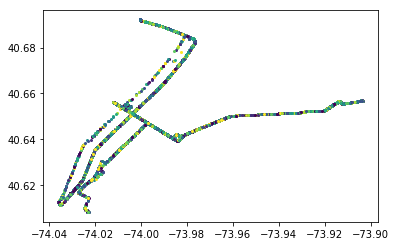

In [199]:
b35.plot()

In [203]:
#that is not what the bus route looks like...